In [1]:
import matplotlib.pyplot as plt
import pandas as pd

import utils

plt.rcParams.update({"font.size": 9})

# preprocess dataframe
df196 = (
    utils.mat_to_pd("datasets/Rat196Vectors_241025.mat")
    .query("Valid == 1 and RT == RT")
    .assign(trialDate=lambda x: pd.to_datetime(x["trialDate"] - 719529, unit="D"))
    .set_index("trialDate")
    .sort_index()
    .assign(
        RT=lambda x: x["RT"] - x["RT"].min() + 1e-2,
        y=lambda x: x["RT"] * x["correct"].map({1: 1, 0: -1}),
        coh_bins=lambda x: pd.cut(x["coherence"], bins=5),
        day=lambda x: ((x.index - pd.Timedelta(hours=14)).floor("D") + pd.Timedelta(hours=14)),  # 2pm - 2pm
        hour=lambda x: x.index.hour + 1,
        minute5=lambda x: (x.index.hour * 12 + x.index.minute // 5),
    )
)

df196.shape

(132743, 21)

In [2]:
# configure plots
ddm_config = {
    "var1": "a",
    "var2": "beta_v",
    "var1_lim": [0.62, 1.66],
    "var2_lim": [-0.14, 3.48],
    "var1_label": r"$\hat{a}$",
    "var2_label": r"$\hat{\beta}_v$",
    "corr_label": r"$\text{{corr}}(\hat{{a}},\hat{{\beta}}_v)={corr:.2f}$",
    "acf_label1": r"$\text{corr}(\hat{a})$",
    "acf_label2": r"$\text{corr}(\hat{\beta}_v)$",
}

rt_acc_config = {
    "var1": "rt",
    "var2": "acc",
    "var1_lim": [0.2, 1.72],
    "var2_lim": [0.5, 1.01],
    "var1_label": r"$\hat{rt}$",
    "var2_label": r"$\hat{acc}$",
    "corr_label": r"$\text{{corr}}(\hat{{rt}},\hat{{acc}})={corr:.2f}$",
    "acf_label1": r"$\text{corr}(\hat{rt})$",
    "acf_label2": r"$\text{corr}(\hat{acc})$",
}

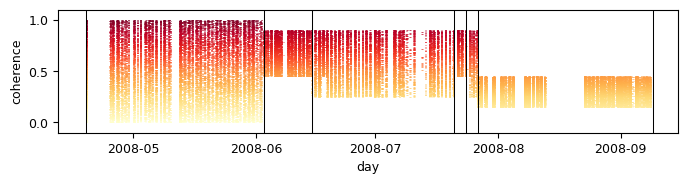

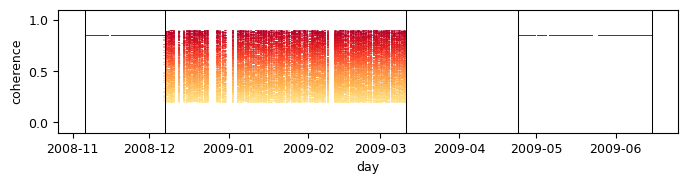

In [3]:
# coherence, 24H sessions
vlines = ["2008-04-19", "2008-06-03", "2008-06-15", "2008-07-21", "2008-07-24", "2008-07-27", "2008-09-09"]
utils.plot_coherence(df196.loc[:"2008-10"], vlines)

# coherence, 2H sessions
vlines = ["2008-11-06", "2008-12-07", "2009-03-11", "2009-04-24", "2009-06-15"]
utils.plot_coherence(df196.loc["2008-10":], vlines)

DDM fits by 1D, 1H, 5M

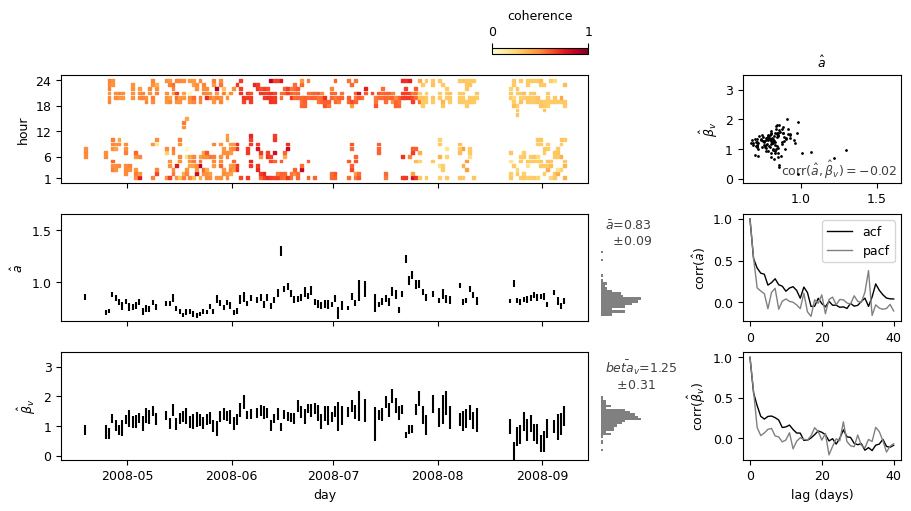

In [4]:
# fit by day, 24H sessions
df196_heatmap = df196.loc[:"2008-10"].groupby(["day", "hour"], as_index=False)["coherence"].mean()
df196_fit_by_day = utils.fit_ddm(df196.loc[:"2008-10"], "day")
utils.plot_fits(df196_heatmap, df196_fit_by_day, x="day", y="hour", config=ddm_config)

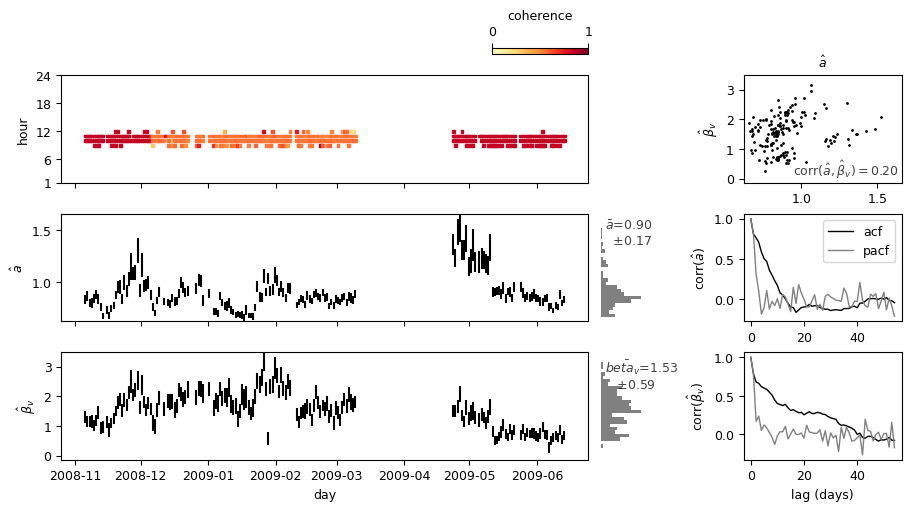

In [5]:
# fit by day, 2H sessions
df196_heatmap = df196.loc["2008-10":].groupby(["day", "hour"], as_index=False)["coherence"].mean()
df196_fit_by_day = utils.fit_ddm(df196.loc["2008-10":], "day")
utils.plot_fits(df196_heatmap, df196_fit_by_day, x="day", y="hour", config=ddm_config)

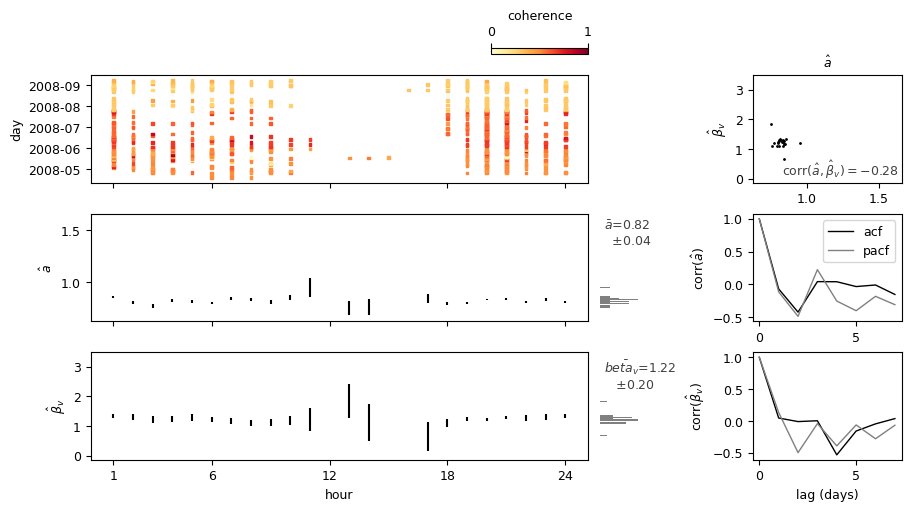

In [6]:
# fit by hour, 24H sessions
df196_heatmap = df196.loc[:"2008-10"].groupby(["day", "hour"], as_index=False)["coherence"].mean()
df196_fit_by_hour = utils.fit_ddm(df196.loc[:"2008-10"], "hour")
utils.plot_fits(df196_heatmap, df196_fit_by_hour, x="hour", y="day", config=ddm_config)

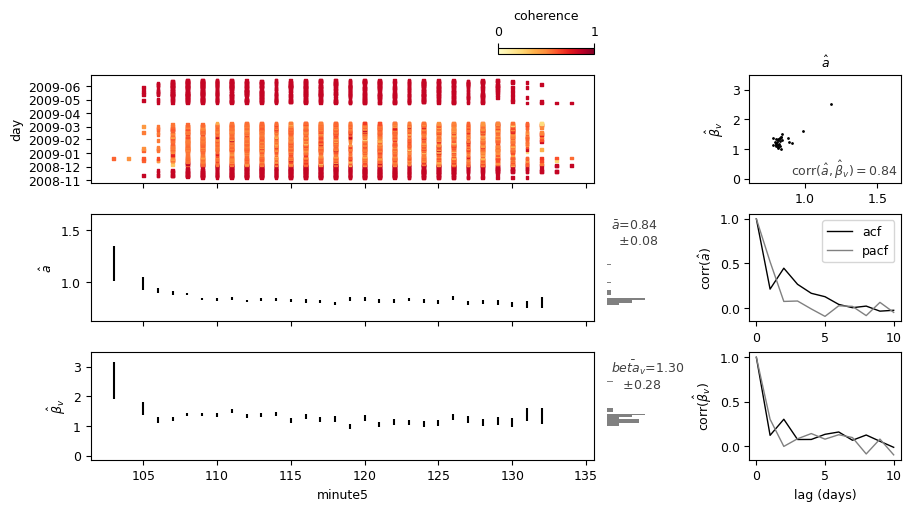

In [7]:
# fit by 5-minute, 2H sessions
df196_heatmap = df196.loc["2008-10":].groupby(["day", "minute5"], as_index=False)["coherence"].mean()
df196_fit_by_minute = utils.fit_ddm(df196.loc["2008-10":], "minute5")
utils.plot_fits(df196_heatmap, df196_fit_by_minute, x="minute5", y="day", config=ddm_config)

RT + ACC fits by 1D, 1H, 5M

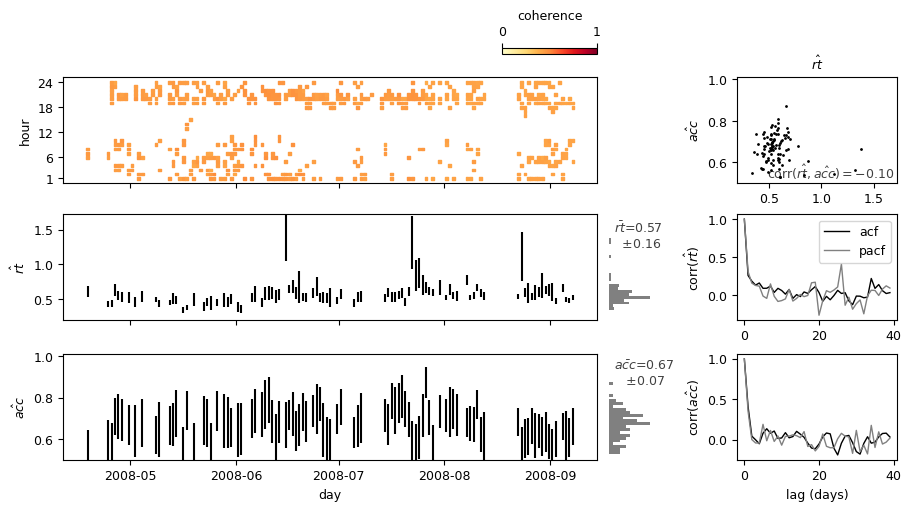

In [8]:
# fit by day, 24H sessions
df196_heatmap = (
    df196.loc[:"2008-10"].query("0.4 < coherence < 0.5").groupby(["day", "hour"], as_index=False)["coherence"].mean()
)
df196_fit_by_day = utils.fit_rt_acc(df196.loc[:"2008-10"].query("0.4 < coherence < 0.5"), "day")
utils.plot_fits(df196_heatmap, df196_fit_by_day, x="day", y="hour", config=rt_acc_config)

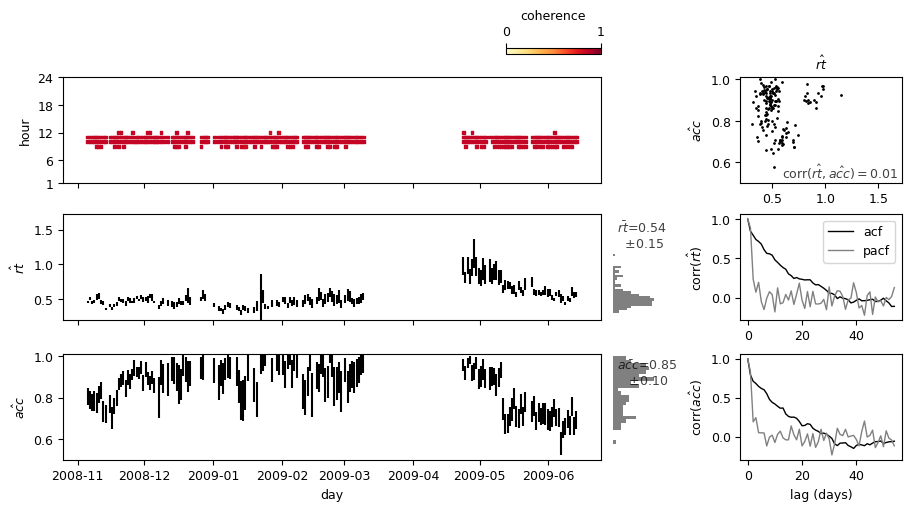

In [9]:
# fit by day, 2H sessions
df196_heatmap = (
    df196.loc["2008-10":].query("0.8 < coherence < 0.9").groupby(["day", "hour"], as_index=False)["coherence"].mean()
)
df196_fit_by_day = utils.fit_rt_acc(df196.loc["2008-10":].query("0.8 < coherence < 0.9"), "day")
utils.plot_fits(df196_heatmap, df196_fit_by_day, x="day", y="hour", config=rt_acc_config)

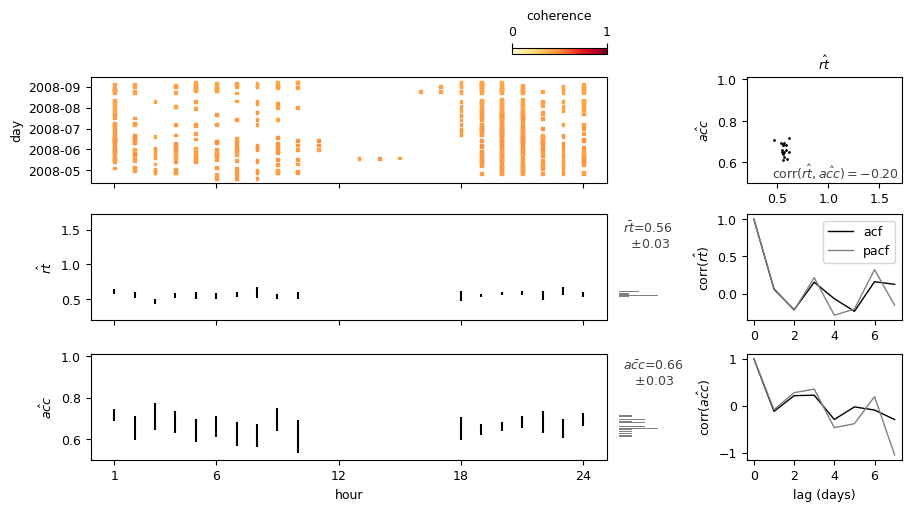

In [10]:
# fit by hour, 24H sessions
df196_heatmap = (
    df196.loc[:"2008-10"].query("0.4 < coherence < 0.5").groupby(["day", "hour"], as_index=False)["coherence"].mean()
)
df196_fit_by_hour = utils.fit_rt_acc(df196.loc[:"2008-10"].query("0.4 < coherence < 0.5"), "hour")
utils.plot_fits(df196_heatmap, df196_fit_by_hour, x="hour", y="day", config=rt_acc_config)

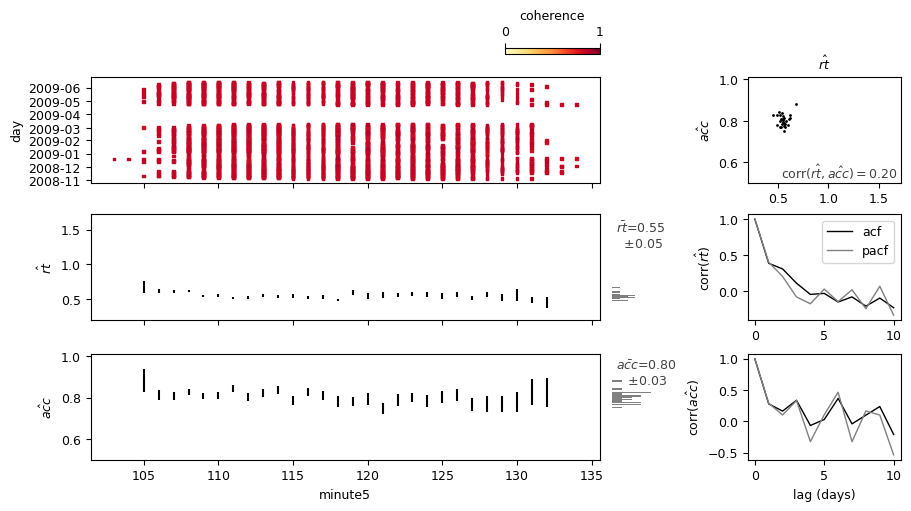

In [11]:
# fit by 5-minute, 2H sessions
df196_heatmap = (
    df196.loc["2008-10":].query("0.8 < coherence < 0.9").groupby(["day", "minute5"], as_index=False)["coherence"].mean()
)
df196_fit_by_minute = utils.fit_rt_acc(df196.loc["2008-10":].query("0.8 < coherence < 0.9"), "minute5")
utils.plot_fits(df196_heatmap, df196_fit_by_minute, x="minute5", y="day", config=rt_acc_config)